In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU


file_path = "../starbucks_open_7year.csv"
data = pd.read_csv(file_path)

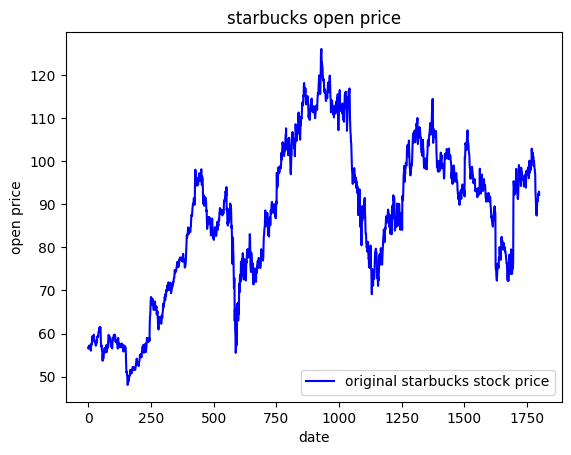

In [57]:
# Visualizing the data
plt.plot(data['Open'], label='original starbucks stock price', color='blue')
plt.title('starbucks open price')
plt.xlabel('date')
plt.ylabel('open price')
plt.legend()
plt.show()

In [65]:
# Preprocessing the data
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date').reset_index(drop=True)

print(data['Open'])

data['Days'] = (data['Date'] - data['Date'].min()).dt.days
data['Days2'] = data['Days'] ** 2
data['Days3'] = data['Days'] ** 3

# Select features
X = data[['Days', 'Days2', 'Days3']].values.astype(float)
y = data['Open'].values.astype(float)

0       56.81
1       56.47
2       56.82
3       56.92
4       57.24
        ...  
1795    92.40
1796    92.04
1797    92.78
1798    92.97
1799    92.19
Name: Open, Length: 1800, dtype: float64


In [66]:
# Normalization (Min-Max Scaling)
X_min, X_max = X.min(), X.max()
y_min, y_max = y.min(), y.max()

X_normalized = (X - X_min) / (X_max - X_min)
y_normalized = (y - y_min) / (y_max - y_min)


In [67]:
# Splitting Data into Training and Testing Sets
split_index = int(len(X_normalized) * 0.8)
X_train, X_test = X_normalized[:split_index], X_normalized[split_index:]
y_train, y_test = y_normalized[:split_index], y_normalized[split_index:]

In [36]:
# Defining the Model

model = Sequential([
    Dense(512, activation='relu', input_dim=X.shape[1]),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation=LeakyReLU(alpha=0.1)),
    Dense(64, activation='relu'),
    Dense(1)
])

/Users/reghunotraghu/Documents/college_projects/dl-group-project/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/reghunotraghu/Documents/college_projects/dl-group-project/.venv/lib/python3.9/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# Train the model
lr_scheduler = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=10, min_lr=1e-6)

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=500, batch_size=16, callbacks=[lr_scheduler])

Epoch 1/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0927 - learning_rate: 0.0010
Epoch 2/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0266 - learning_rate: 0.0010
Epoch 3/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0196 - learning_rate: 0.0010
Epoch 4/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0153 - learning_rate: 0.0010
Epoch 5/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0152 - learning_rate: 0.0010
Epoch 6/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0160 - learning_rate: 0.0010
Epoch 7/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0135 - learning_rate: 0.0010
Epoch 8/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0113 - learning_rate: 0.0010
Epoch 9/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0112 - learning_rate: 0.0010
Epoch 10/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0097 - learning_rate: 0.0010
Epoch 11/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0088 - learning_rate: 0.0010
Epoch 12

In [71]:
# Make predictions
y_pred_normalized = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [72]:
# Inverse transform the predictions and actual values
y_pred = y_pred_normalized * (y_max - y_min) + y_min
y_actual = y_test * (y_max - y_min) + y_min

In [74]:
# Compute evaluation metrics
mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)
mape = (abs((y_actual - y_pred) / y_pred)).mean() * 100

# Print the results
print(f"Model Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error): {mae:.4f}")
print(f"MSE  (Mean Squared Error): {mse:.4f}")
print(f"R² Score (R-squared): {r2:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

Model Evaluation Metrics:
MAE  (Mean Absolute Error): 7.6235
MSE  (Mean Squared Error): 83.5770
R² Score (R-squared): -0.2385
MAPE (Mean Absolute Percentage Error): 8.58%


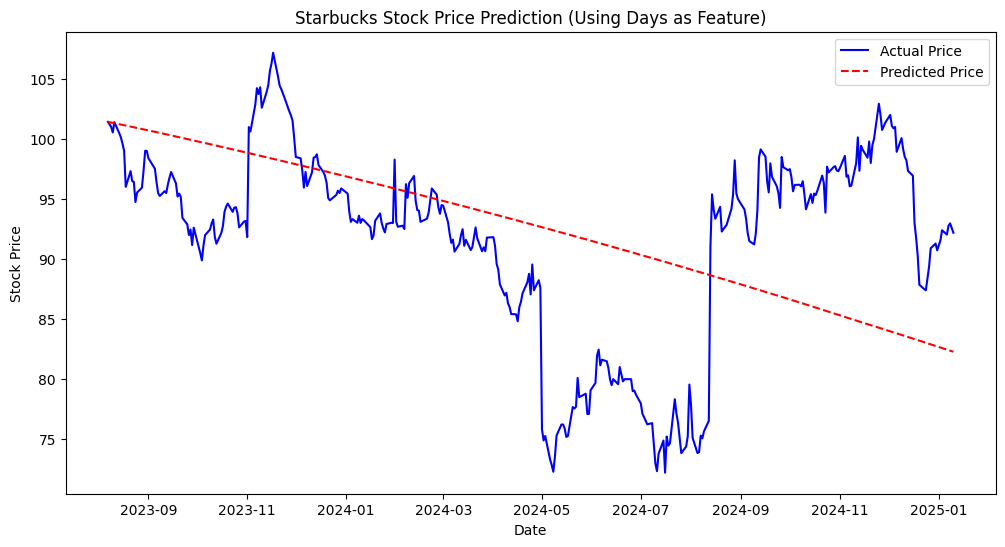

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data['Date'].iloc[split_index:], y_actual, label='Actual Price', color='blue')
plt.plot(data['Date'].iloc[split_index:], y_pred, label='Predicted Price', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Starbucks Stock Price Prediction (Using Days as Feature)')
plt.legend()
plt.show()